# HW2 Coding Question

### Part B

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

,x,y
0,0.10620,0.70784
1,1.28020,0.27985
2,0.19975,0.70254
3,0.26060,-0.68358
4,1.37180,-0.15140
...,...,...
995,0.98002,0.49885
996,-0.62130,0.64558
997,-0.96359,0.52774
998,0.87000,-0.54568


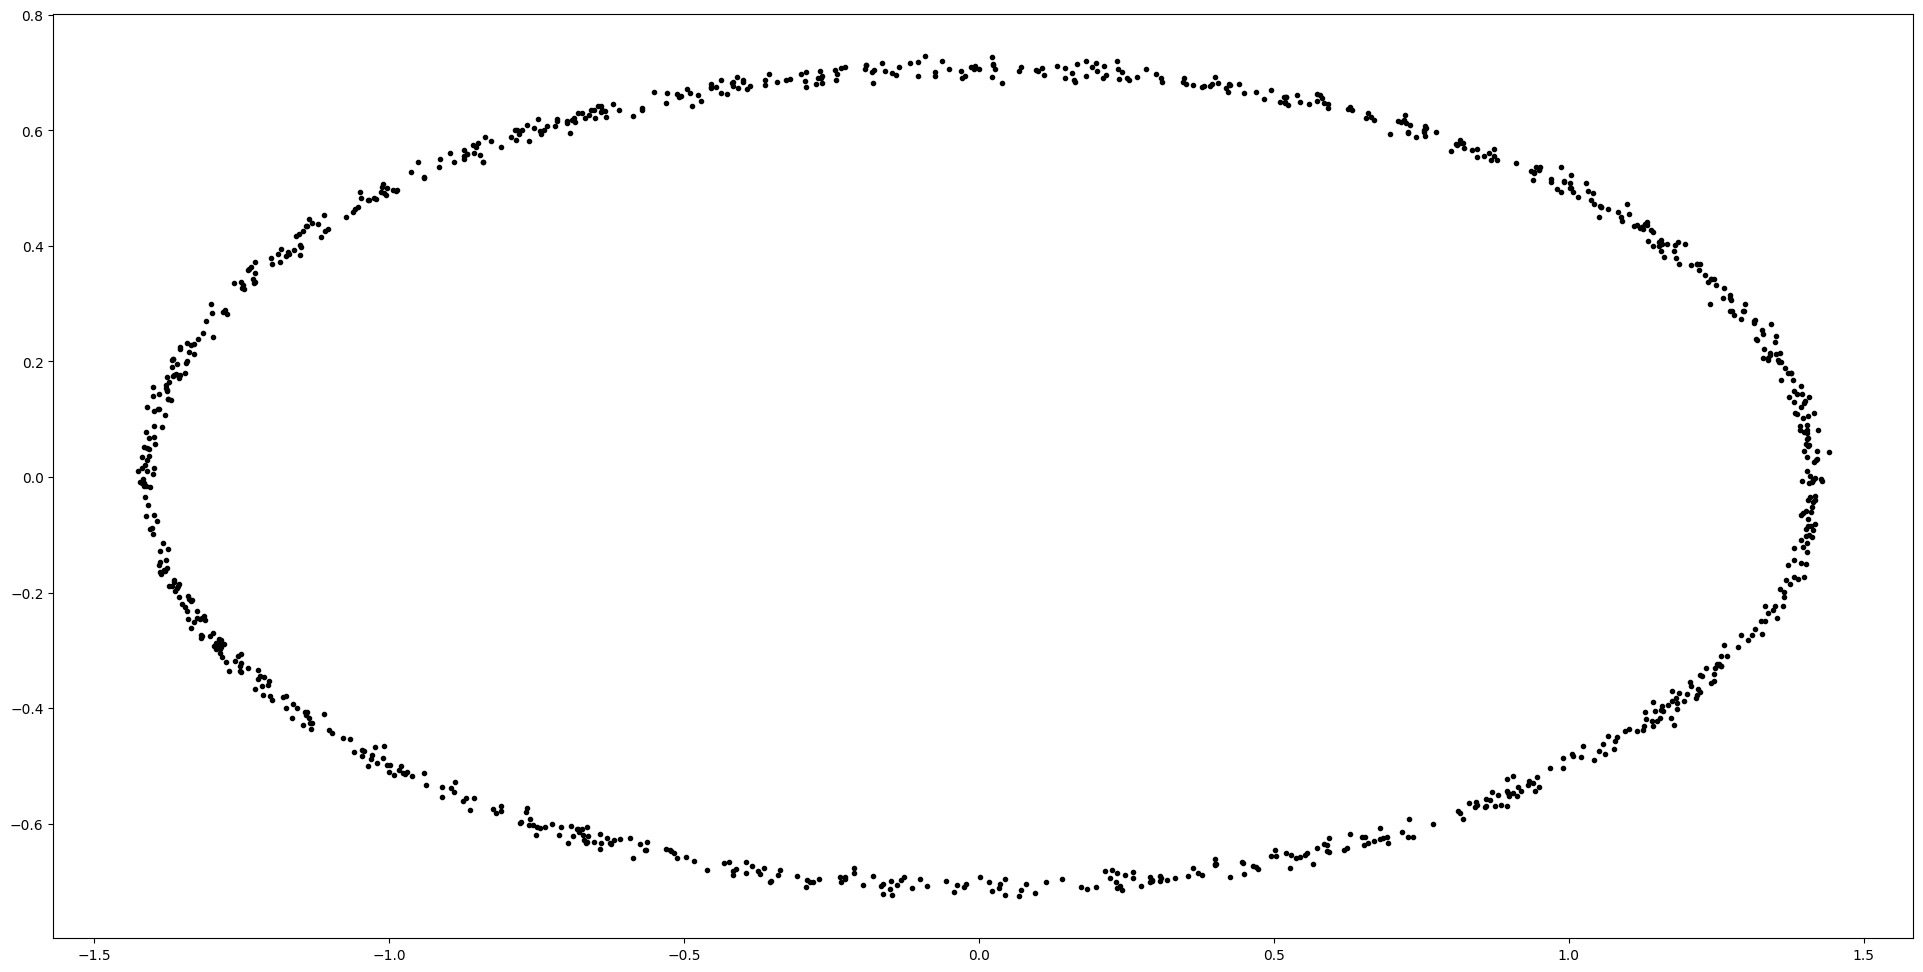

In [3]:
ellipse = pd.read_csv('HW2_ellipse.csv', header=None)
ellipse.columns = ['x', 'y']
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(1, 1, 1)  
ax.plot(ellipse['x'], ellipse['y'], '.', color='black')
ellipse

### Part C

$$A = \begin{bmatrix}
        x_1^2 & y_1^2 \\
        \vdots & \vdots \\
        x_N^2 & y_N^2
      \end{bmatrix}, \quad b = \begin{bmatrix}
      1 \\
      \vdots \\
      1 
      \end{bmatrix}, \quad \mu = \frac{1}{2\|A^TA\|}$$
$$f(a) = \|Aa - b\|^2_2$$
$$\nabla f(a) = 2A^T(Aa - b)$$
$$a^{(t)} = a^{(t - 1)} - \mu \nabla f(a^{(t - 1)})$$


In [4]:
A = ellipse.values * ellipse.values
b = np.ones((A.shape[0], 1))
mu = 1/(2 * np.linalg.norm(A.T @ A, 2))
a = np.random.rand(2, 1)

def f(x):
    return np.linalg.norm(A @ x - b)**2

def df(x):
    return 2 * A.T @ (A @ x - b)

for i in range(1000):
    a = a - mu * df(a)

print(a, f(a), df(a))

[[0.50012463]
 [1.99463529]] 0.46410199444099626 [[ 7.92144128e-14]
 [-2.78554957e-13]]


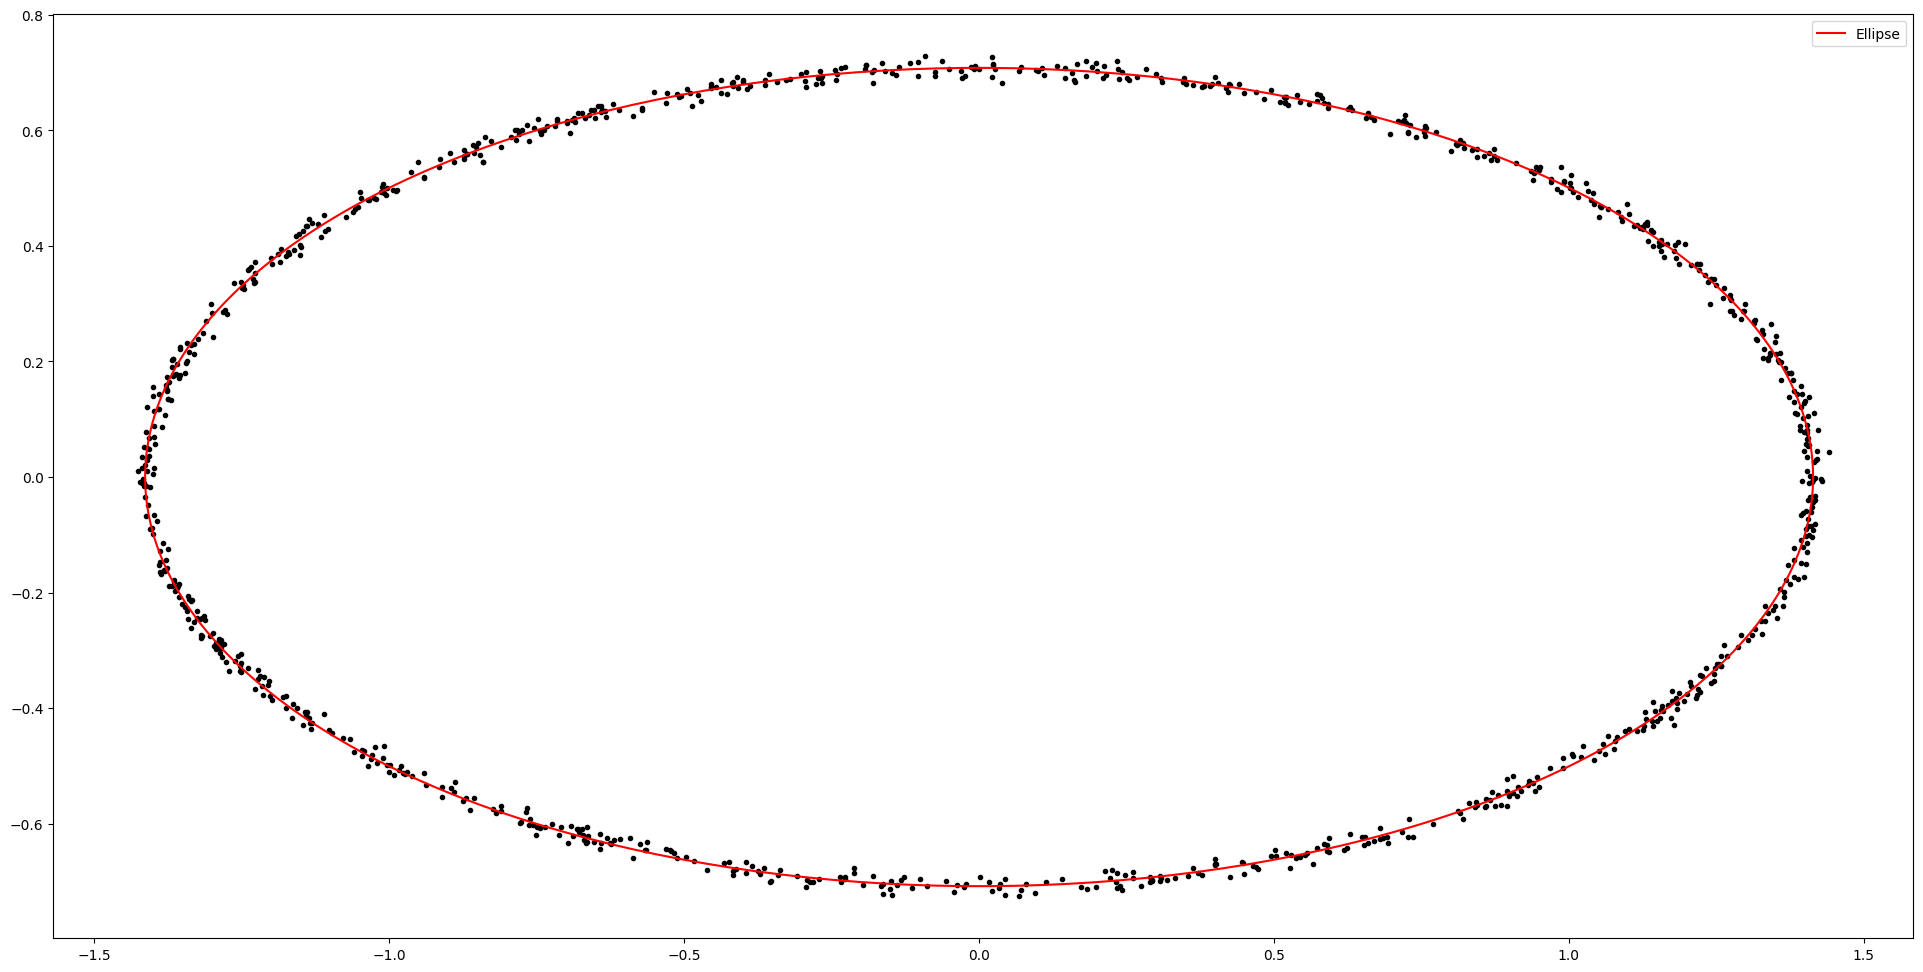

In [5]:
theta = np.linspace(0, 2 * np.pi, 400)

x_val = np.cos(theta) / np.sqrt(a[0])
y_val = np.sin(theta) / np.sqrt(a[1])

fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(1, 1, 1)  
ax.plot(ellipse['x'], ellipse['y'], '.', color='black')

ax.plot(x_val, y_val, color='red', label='Ellipse')
ax.legend()
plt.show()